<a href="https://colab.research.google.com/github/Satyake/Triplet-Loss_Siamese_NN/blob/master/FNFSIAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/Test.zip


Archive:  /content/Test.zip
   creating: Test/F/
  inflating: Test/F/F07.JPG          
  inflating: Test/F/F07S03R01.JPG    
  inflating: Test/F/F07S04R01.JPG    
  inflating: Test/F/F07S04R05.JPG    
  inflating: Test/F/F08.JPG          
  inflating: Test/F/F09.JPG          
  inflating: Test/F/F10.JPG          
  inflating: Test/F/F11.JPG          
  inflating: Test/F/F12.JPG          
  inflating: Test/F/F13.jpg          
  inflating: Test/F/F14.jpg          
  inflating: Test/F/F15.JPG          
  inflating: Test/F/FF1.jpg          
  inflating: Test/F/FF2.jpg          
  inflating: Test/F/FF3.jpg          
  inflating: Test/F/FF4.jpg          
  inflating: Test/F/FF5.jpg          
  inflating: Test/F/FF6.jpg          
  inflating: Test/F/FF7.jpg          
  inflating: Test/F/FF8.jpg          
  inflating: Test/F/FF9.jpg          
   creating: Test/NF/
  inflating: Test/NF/D10125.JPG      
  inflating: Test/NF/D1024.JPG       
  inflating: Test/NF/D1033.JPG       
  inflating: Test

In [ ]:
file_dir = '/content/Test/NF'
files = glob.glob(file_dir)
x3t = []
for f1 in files:
    img_dir = os.path.join(f1,'*')
    images = glob.glob(img_dir)
    for img in images:
        img_temp = cv2.imread(img)
        img_temp=cv2.cvtColor(img_temp,cv2.COLOR_BGR2GRAY)
        img_temp = cv2.resize(img_temp,(512,512))
        x3t.append(img_temp)

file_dir = '/content/Test/F'
files = glob.glob(file_dir)
x3 = []
for f1 in files:
    img_dir = os.path.join(f1,'*')
    images = glob.glob(img_dir)
    for img in images:
        img_temp = cv2.imread(img)
        img_temp=cv2.cvtColor(img_temp,cv2.COLOR_BGR2GRAY)
        img_temp = cv2.resize(img_temp,(512,512))
        x3.append(img_temp)

file_dir = '/content/Train/F'
files = glob.glob(file_dir)
x = []
for f1 in files:
    img_dir = os.path.join(f1,'*')
    images = glob.glob(img_dir)
    for img in images:
        img_temp = cv2.imread(img)
        img_temp=cv2.cvtColor(img_temp,cv2.COLOR_BGR2GRAY)
        img_temp = cv2.resize(img_temp,(512,512))
        x.append(img_temp)
file_dir = '/content/Train/NF'
files = glob.glob(file_dir)
x2 = []
for f1 in files:
    img_dir = os.path.join(f1,'*')
    images = glob.glob(img_dir)
    for img in images:
        img_temp = cv2.imread(img)
        img_temp=cv2.cvtColor(img_temp,cv2.COLOR_BGR2GRAY)
        img_temp = cv2.resize(img_temp,(512,512))
        x2.append(img_temp)
x_train1=np.array(x)
y_train1=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_train1=np.array(y_train1)
x_train2=np.array(x2)
y_train2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
x_train=np.concatenate([x_train1,x_train2],axis=0)
y_train=np.concatenate([y_train1,y_train2],axis=0)

x_test1=np.array(x3)
y_test1=np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
y_test1.shape
x_test2=np.array(x3t)
y_test2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
x_test2.shape
x_test=np.concatenate([x_test1,x_test2],axis=0)
y_test=np.concatenate([y_test1,y_test2],axis=0)

In [ ]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return precision




Using TensorFlow backend.


In [ ]:
y_test.shape

(42,)

In [ ]:
import numpy as np
import glob
from sklearn.preprocessing import LabelBinarizer
import cv2
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate,BatchNormalization
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
import os
import pickle
import matplotlib.pyplot as plt
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC
# Define our own plot function
def scatter(x, labels, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.savefig(subtitle)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train_flat = x_train.reshape(-1,262144)
x_test_flat = x_test.reshape(-1,262144)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarnin

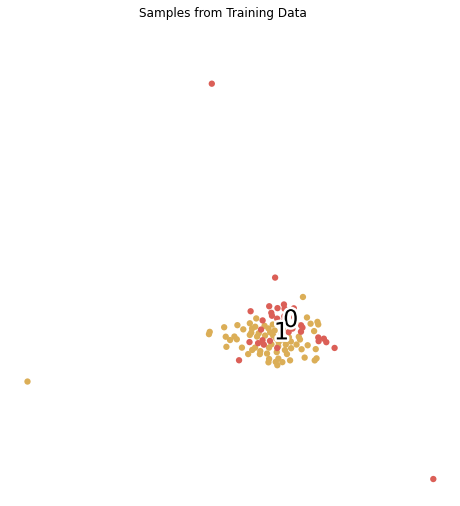

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


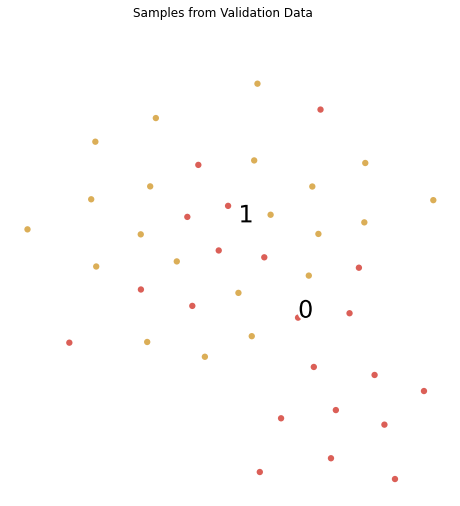

In [ ]:
tsne = TSNE()
train_tsne_embeds = tsne.fit_transform(x_train_flat[:512])
scatter(train_tsne_embeds, y_train[:108], "Samples from Training Data")

eval_tsne_embeds = tsne.fit_transform(x_test_flat[:512])
scatter(eval_tsne_embeds, y_test[:42], "Samples from Validation Data")

In [ ]:
Classifier_input = Input((262144,))
Classifier_output = Dense(1, activation='sigmoid')(Classifier_input)
Classifier_model = Model(Classifier_input, Classifier_output)

In [ ]:
le = LabelBinarizer()
y_train_onehot = le.fit_transform(y_train)
y_test_onehot = le.transform(y_test)


In [ ]:
Classifier_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Classifier_model.fit(x_train_flat,y_train_onehot, validation_data=(x_test_flat,y_test_onehot),epochs=500)

Train on 108 samples, validate on 42 samples
Epoch 1/500
108/108 [==============================] - 0s 3ms/step - loss: 1439.9693 - accuracy: 0.6296 - val_loss: 1958.7319 - val_accuracy: 0.5000
Epoch 2/500
108/108 [==============================] - 0s 585us/step - loss: 538.2642 - accuracy: 0.4630 - val_loss: 1218.1898 - val_accuracy: 0.5000
Epoch 3/500
108/108 [==============================] - 0s 581us/step - loss: 573.3965 - accuracy: 0.6667 - val_loss: 1041.5354 - val_accuracy: 0.5000
Epoch 4/500
108/108 [==============================] - 0s 583us/step - loss: 955.5132 - accuracy: 0.4259 - val_loss: 2291.5076 - val_accuracy: 0.5000
Epoch 5/500
108/108 [==============================] - 0s 602us/step - loss: 1300.6486 - accuracy: 0.6667 - val_loss: 59.3060 - val_accuracy: 0.6190
Epoch 6/500
108/108 [==============================] - 0s 606us/step - loss: 491.4144 - accuracy: 0.5278 - val_loss: 417.2073 - val_accuracy: 0.5952
Epoch 7/500
108/108 [==============================] - 0s 

In [ ]:
def generate_triplet(x,y,testsize=0.3,ap_pairs=10,an_pairs=10):
    data_xy = tuple([x,y])

    trainsize = 1-testsize

    triplet_train_pairs = []
    triplet_test_pairs = []
    for data_class in sorted(set(data_xy[1])):

        same_class_idx = np.where((data_xy[1] == data_class))[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        A_P_pairs = random.sample(list(permutations(same_class_idx,2)),k=ap_pairs) #Generating Anchor-Positive pairs
        Neg_idx = random.sample(list(diff_class_idx),k=an_pairs)
        

        #train
        A_P_len = len(A_P_pairs)
        Neg_len = len(Neg_idx)
        for ap in A_P_pairs[:int(A_P_len*trainsize)]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_train_pairs.append([Anchor,Positive,Negative])               
        #test
        for ap in A_P_pairs[int(A_P_len*trainsize):]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_test_pairs.append([Anchor,Positive,Negative])    
                
    return np.array(triplet_train_pairs), np.array(triplet_test_pairs)

In [ ]:
X_train, X_test = generate_triplet(x_train_flat,y_train, ap_pairs=20, an_pairs=20,testsize=0.2)

In [ ]:
def triplet_loss(y_true, y_pred, alpha = 0.4):
    """
    Implementation of the triplet loss function
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor data
            positive -- the encodings for the positive data (similar to anchor)
            negative -- the encodings for the negative data (different from anchor)
    Returns:
    loss -- real number, value of the loss
    """
    print('y_pred.shape = ',y_pred)
    
    total_lenght = y_pred.shape.as_list()[-1]
#     print('total_lenght=',  total_lenght)
#     total_lenght =12
    
    anchor = y_pred[:,0:int(total_lenght*1/3)]
    positive = y_pred[:,int(total_lenght*1/3):int(total_lenght*2/3)]
    negative = y_pred[:,int(total_lenght*2/3):int(total_lenght*3/3)]

    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)

    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)

    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
 
    return loss

In [ ]:
def create_base_network(in_dims):
    """
    Base network to be shared.
    """
    model = Sequential()
    model.add(Conv2D(5,(1,1),padding='same',input_shape=(in_dims[0],in_dims[1],in_dims[2],),activation='relu',name='conv1'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2),(2,2),padding='same',name='pool1'))
    model.add(Conv2D(10,(1,1),padding='same',activation='relu',name='conv2'))
    model.add(MaxPooling2D((2,2),(2,2),padding='same',name='pool2'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(500,activation='relu'))
    model.add(Dense(500,activation='relu'))

    model.add(Dense(4,name='embeddings'))
    # model.add(Dense(600))
    
    return model

In [ ]:
adam_optim = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

In [ ]:
anchor_input = Input((512,512,1, ), name='anchor_input')
positive_input = Input((512,512,1, ), name='positive_input')
negative_input = Input((512,512,1, ), name='negative_input')

# Shared embedding layer for positive and negative items
Shared_DNN = create_base_network([512,512,1,])


encoded_anchor = Shared_DNN(anchor_input)
encoded_positive = Shared_DNN(positive_input)
encoded_negative = Shared_DNN(negative_input)


merged_vector = concatenate([encoded_anchor, encoded_positive, encoded_negative], axis=-1, name='merged_layer')

model = Model(inputs=[anchor_input,positive_input, negative_input], outputs=merged_vector)
model.compile(loss=triplet_loss, optimizer=adam_optim)

y_pred.shape =  Tensor("merged_layer_1/concat:0", shape=(None, 12), dtype=float32)


In [ ]:
Anchor = X_train[:,0,:].reshape(-1,512,512,1)
Positive = X_train[:,1,:].reshape(-1,512,512,1)
Negative = X_train[:,2,:].reshape(-1,512,512,1)
Anchor_test = X_test[:,0,:].reshape(-1,512,512,1)
Positive_test = X_test[:,1,:].reshape(-1,512,512,1)
Negative_test = X_test[:,2,:].reshape(-1,512,512,1)

Y_dummy = np.empty((Anchor.shape[0],40))
Y_dummy2 = np.empty((Anchor_test.shape[0],1))

model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=12, epochs=10)


Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 25s 39ms/step - loss: 144.9852 - val_loss: 8295.6074
Epoch 2/10
640/640 [==============================] - 25s 39ms/step - loss: 118.9563 - val_loss: 24777.4201
Epoch 3/10
640/640 [==============================] - 25s 39ms/step - loss: 27.7140 - val_loss: 28123.7209
Epoch 4/10
640/640 [==============================] - 26s 40ms/step - loss: 10.6498 - val_loss: 30618.6740
Epoch 5/10
640/640 [==============================] - 25s 40ms/step - loss: 0.0954 - val_loss: 30813.3431
Epoch 6/10
640/640 [==============================] - 25s 38ms/step - loss: 0.0000e+00 - val_loss: 30934.3063
Epoch 7/10
640/640 [==============================] - 24s 38ms/step - loss: 0.0000e+00 - val_loss: 30934.6778
Epoch 8/10
640/640 [==============================] - 24s 38ms/step - loss: 0.0000e+00 - val_loss: 30934.6891
Epoch 9/10
640/640 [==============================] - 24s 38ms/step - loss: 0.0000e+00 - 

In [ ]:
trained_model = Model(inputs=anchor_input, outputs=encoded_anchor)

In [ ]:
tsne = TSNE()
X_train_trm = trained_model.predict(x_train[:108].reshape(-1,512,512,1))
X_test_trm = trained_model.predict(x_test[:42].reshape(-1,512,512,1))
train_tsne_embeds = tsne.fit_transform(X_train_trm)
eval_tsne_embeds = tsne.fit_transform(X_test_trm)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and

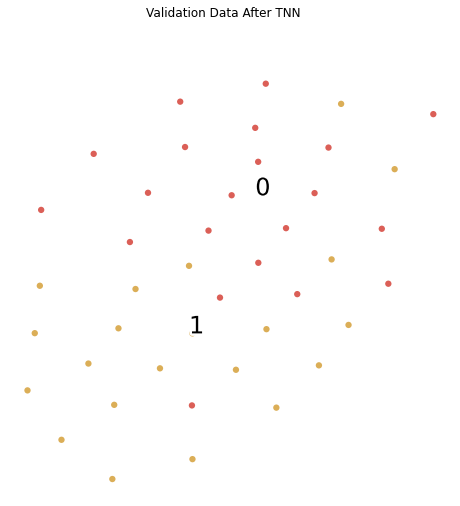

In [ ]:
scatter(eval_tsne_embeds, y_test[:512], "Validation Data After TNN")

In [ ]:
X_train_trm = trained_model.predict(x_train.reshape(-1,512,512,1))
X_test_trm = trained_model.predict(x_test.reshape(-1,512,512,1))

Classifier_input = Input((4,))
Classifier_output = Dense(1, activation='sigmoid')(Classifier_input)
Classifier_model = Model(Classifier_input, Classifier_output)


Classifier_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Classifier_model.fit(X_train_trm,y_train_onehot, validation_data=(X_test_trm,y_test_onehot),epochs=1000)

Train on 108 samples, validate on 42 samples
Epoch 1/1000
108/108 [==============================] - 0s 792us/step - loss: 41.0588 - f1: 0.5000 - val_loss: 41.0370 - val_f1: 0.5000
Epoch 2/1000
108/108 [==============================] - 0s 62us/step - loss: 39.0751 - f1: 1.0000 - val_loss: 39.3856 - val_f1: 0.5000
Epoch 3/1000
108/108 [==============================] - 0s 64us/step - loss: 36.9167 - f1: 1.0000 - val_loss: 37.7353 - val_f1: 0.5000
Epoch 4/1000
108/108 [==============================] - 0s 63us/step - loss: 34.8769 - f1: 1.0000 - val_loss: 36.0823 - val_f1: 0.5000
Epoch 5/1000
108/108 [==============================] - 0s 62us/step - loss: 32.8154 - f1: 1.0000 - val_loss: 34.4418 - val_f1: 0.5000
Epoch 6/1000
108/108 [==============================] - 0s 61us/step - loss: 30.7967 - f1: 1.0000 - val_loss: 32.7986 - val_f1: 0.5000
Epoch 7/1000
108/108 [==============================] - 0s 60us/step - loss: 28.9176 - f1: 0.7500 - val_loss: 31.1581 - val_f1: 0.5000
Epoch 8/1

In [ ]:
y_pred=model.predict(X_test_trm)

ValueError: ignored

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest_one_hot, verbose=0)


NameError: ignored